# 3 SuperTrend + EMA + StochRSI

### buy--condition : somme_supertrend( [1], [2], [3] ) >=1 and StochRSI < 0.8 and Close > EMA
### sell--condition : somme_supertrend( [1], [2], [3] ) < 1 and StochRSI > 0.2

In [1]:
from binance.client import Client
from scipy.signal import argrelextrema
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import btalib
import ta
import pandas_ta as pda
warnings.filterwarnings('ignore')

api_secret = 'vRrs2d0ykMDTbueG6ld06gL8eiXqJnHqRWwpZ5xb5UfGO8tt6bLs3OaYGXgmArYu'
api_key = 'mH4dfyAtk73b9ExEl4ggSVhDScBU4F9ucAdohY2GgFiZz2GWqhXTZMfYkis0LfV4'
client = Client(api_key, api_secret)

In [2]:
try:
    symbol = 'ETHUSDT'
    time = '5 years ago'

    klines = client.get_historical_klines(symbol, Client.KLINE_INTERVAL_1HOUR,time)

    df = pd.DataFrame(klines, columns=['date', 'open', 'high','low','close','volume', 'None', 'None','None','None','None','None'])
    df = df.drop('None', axis=1)
    df.set_index('date', inplace = True)
    df.index = pd.to_datetime(df.index, unit='ms')

    df['open'] = pd.to_numeric(df['open'], errors ='coerce')
    df['high'] = pd.to_numeric(df['high'], errors ='coerce')
    df['low'] = pd.to_numeric(df['low'], errors ='coerce')
    df['close'] = pd.to_numeric(df['close'], errors ='coerce')
    df['volume'] = pd.to_numeric(df['volume'], errors ='coerce')

    price_high, price_low, price_close = df['high'].values, df['low'].values, df['close'].values
except:
    pass

In [3]:
df.drop(df.columns.difference(['open','high','low','close','volume']), 1, inplace=True)
df['EMA90']=ta.trend.sma_indicator(df['close'], 110)

df['STOCH_RSI']=ta.momentum.stochrsi(df['close'])

ST_length = 20
ST_multiplier = 3.0
superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
df['SUPER_TREND_DIRECTION1'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]

ST_length = 20
ST_multiplier = 4.0
superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
df['SUPER_TREND_DIRECTION2'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]

ST_length = 40
ST_multiplier = 8.0
superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
df['SUPER_TREND_DIRECTION3'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]

df

,open,high,low,close,volume,EMA90,STOCH_RSI,SUPER_TREND,SUPER_TREND_DIRECTION1,SUPER_TREND_DIRECTION2,SUPER_TREND_DIRECTION3
date,,,,,,,,,,,
2017-08-17 04:00:00,301.13,302.57,298.00,301.61,125.66877,NaN,NaN,0.000000,1,1,1
2017-08-17 05:00:00,301.61,303.28,300.00,303.10,377.67246,NaN,NaN,NaN,1,1,1
2017-08-17 06:00:00,302.40,304.44,301.90,302.68,303.86672,NaN,NaN,NaN,1,1,1
2017-08-17 07:00:00,302.68,307.96,302.60,307.96,754.74510,NaN,NaN,NaN,1,1,1
2017-08-17 08:00:00,307.95,309.97,307.00,308.62,150.75029,NaN,NaN,NaN,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-19 08:00:00,2812.05,2819.33,2780.04,2781.82,14630.24800,2997.864636,0.508114,3082.659738,-1,-1,-1
2022-02-19 09:00:00,2781.90,2792.57,2774.16,2783.36,9062.79700,2996.989364,0.540510,3066.834419,-1,-1,-1
2022-02-19 10:00:00,2783.37,2788.88,2762.04,2778.81,13780.09280,2995.928091,0.485063,3057.210684,-1,-1,-1


        i       result
7    80.0  2861.851806
8    90.0  2932.021585
12  130.0  3090.030895
10  110.0  3100.750934
9   100.0  3228.622933
18  190.0  3280.187815
11  120.0  3377.844293
14  150.0  3424.051838
6    70.0  3429.490844
17  180.0  3473.372199
13  140.0  3795.120002
5    60.0  4012.666194
4    50.0  4166.497521
16  170.0  4174.573032
0    10.0  4226.498523
3    40.0  4512.275251
1    20.0  4536.685824
15  160.0  4605.001566
2    30.0  4800.701166


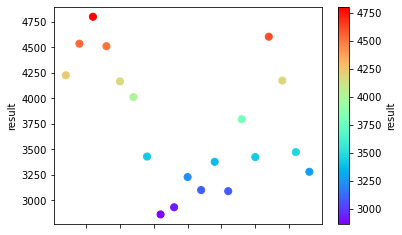

In [4]:
dt = None
dt = pd.DataFrame(columns = ['i', 'result'])
count=0

for i in range(10,200,10):
    
      df['EMA50']=ta.trend.sma_indicator(df['close'], i)

      dfTest = df.copy()
      usdt = 100
      coin = 0
      fee = 0.0007
      wallet = 100

      for index, row in dfTest.iterrows():
          #BUY
          if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] >= 1 and row['STOCH_RSI'] < 0.8 and row['close']>row['EMA50'] and usdt > 0:
              buyPrice = row['close']
              coin = usdt/buyPrice
              coin = coin - fee*coin
              usdt = 0
              wallet = coin * row['close']

          #SELL
          if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] < 1 and row['STOCH_RSI'] > 0.2 and coin > 0:
              sellPrice = row['close']
              usdt = coin*sellPrice
              usdt = usdt - fee*usdt
              coin = 0
              wallet = usdt

      myrow = {'i': i,'result': wallet}
      dt = dt.append(myrow,ignore_index=True) 
print(dt.sort_values(by=['result']))
dt.plot.scatter(x='i',y=1,c='result',s=50,colormap='rainbow') 
plt.show()

Period : [2017-08-17 04:00:00] -> [2022-02-19 12:00:00]
Starting balance : 100 $
Final balance : 310075.09 $
Performance vs US Dollar : 3000.75 %
Buy and Hold Performence : 803.67 %
Performance vs Buy and Hold : 273.38 %
Number of negative trades :  163
Number of positive trades :  110
Average Positive Trades :  9.07 %
Average Negative Trades :  -3.21 %
Best trade +62.94 %, the  2021-01-04 12:00:00
Worst trade -11.97 %, the  2021-01-11 07:00:00
Worst drawBack -50.0 %
Total fee :  66547.71 $
PLOT


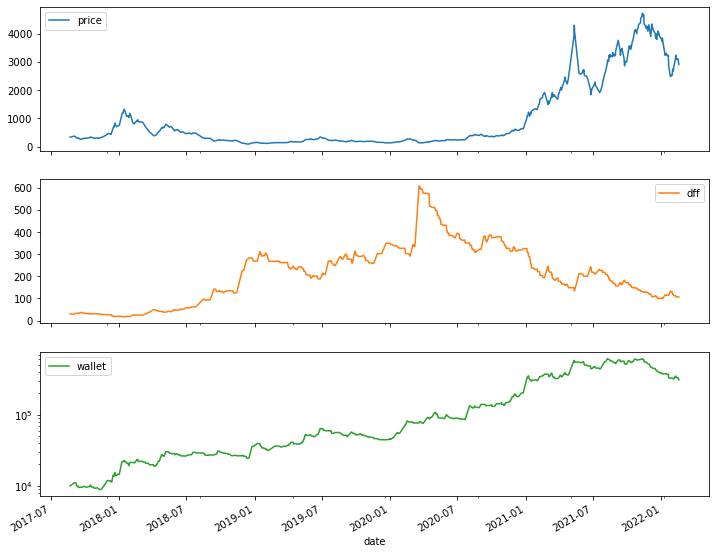

In [5]:
dfTest = df.copy()
dt = None
dt = pd.DataFrame(columns = ['date','position', 'price', 'frais' ,'fiat', 'coins', 'wallet', 'drawBack'])

usdt = 10000
initalWallet = usdt
coin = 0
wallet = 10000
lastAth = 0
lastRow = dfTest.iloc[0]
fee = 0.0007
stopLoss = 0
goOn = True

for index, row in dfTest.iterrows():

  if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] >= 1 and row['STOCH_RSI'] < 0.8 and row['close']>row['EMA90'] and usdt > 0 and goOn == True:
    buyPrice = row['close']

    coin = usdt / buyPrice
    frais = fee * coin
    coin = coin - frais
    usdt = 0
    wallet = coin * row['close']
    if wallet > lastAth:
      lastAth = wallet
    #print('buy')

    myrow = {'date': index,'position': "Buy",'price': buyPrice,'frais': frais * row['close'],'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)

  # Sell
  elif row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] < 1 and row['STOCH_RSI'] > 0.2:
    goOn = True
    if coin > 0:
      #print('sell')
      sellPrice = row['close']
      usdt = coin * sellPrice
      frais = fee * usdt
      usdt = usdt - frais
      coin = 0
      wallet = usdt
      if wallet > lastAth:
        lastAth = wallet

      myrow = {'date': index,'position': "Sell",'price': sellPrice,'frais': frais,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
      dt = dt.append(myrow,ignore_index=True)
  
  lastRow = row

#///////////////////////////////////////
print("Period : [" + str(dfTest.index[0]) + "] -> [" +str(dfTest.index[len(dfTest)-1]) + "]")
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)
dt['resultat'] = dt['wallet'].diff()
dt['resultat%'] = dt['wallet'].pct_change()*100
dt.loc[dt['position']=='Buy','resultat'] = None
dt.loc[dt['position']=='Buy','resultat%'] = None

dt['tradeIs'] = ''
dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[len(dfTest)-1]['close']
holdPorcentage = ((lastClose - iniClose)/iniClose) * 100
algoPorcentage = ((wallet - initalWallet)/initalWallet) * 100
vsHoldPorcentage = ((algoPorcentage - holdPorcentage)/holdPorcentage) * 100

print("Starting balance : 100 $")
print("Final balance :",round(wallet,2),"$")
print("Performance vs US Dollar :",round(algoPorcentage,2),"%")
print("Buy and Hold Performence :",round(holdPorcentage,2),"%")
print("Performance vs Buy and Hold :",round(vsHoldPorcentage,2),"%")
print("Number of negative trades : ",dt.groupby('tradeIs')['date'].nunique()['Bad'])
print("Number of positive trades : ",dt.groupby('tradeIs')['date'].nunique()['Good'])
print("Average Positive Trades : ",round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(),2),"%")
print("Average Negative Trades : ",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(),2),"%")
idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
print("Best trade +"+str(round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(),2)),"%, the ",dt['date'][idbest])
print("Worst trade",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(),2),"%, the ",dt['date'][idworst])
print("Worst drawBack", str(100*round(dt['drawBack'].min(),2)),"%")
print("Total fee : ",round(dt['frais'].sum(),2),"$")

dt['dff'] = dt['wallet']/dt['price']

dt[['price','dff','wallet']].plot(subplots=True, figsize=(12,10))
plt.semilogy()
print('PLOT')
# dt